#Lemon segmentation tuning


##Import libraries

In [0]:
import os,sys
import cv2 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import skimage
from skimage.morphology import square
from skimage import data, img_as_float
from skimage import exposure
from skimage.filters import threshold_otsu
from skimage import data
from skimage.exposure import histogram
from skimage.util import img_as_ubyte
from skimage.io import imread
from skimage.morphology import black_tophat
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage.morphology import area_closing
from skimage.io import imsave
from skimage.morphology import white_tophat
from google.colab import drive
import time
from tqdm import tqdm

##Helper functions definition

In [0]:
# Helper functions
def load_image(infilename):
    data = imread(infilename)
    return data

def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg


##Load database

In [3]:
# Database upload
##First, you must save the folder in your drive [link: https://drive.google.com/open?id=1Bo9Fn2fzcYSSZ8rgXDzmvXZuHzGoAhJ6]
drive.mount('/content/gdrive/')
root_path = 'gdrive/My Drive/Lemonator/Lemonator/' 
images=root_path+'images/'
segmented=root_path+'segmented/'
#groundtruth=root_path+'groundtruth/' 
masks=root_path+'masks/' 
files=os.listdir(segmented)
#filesg= os.listdir(groundtruth)
#filesm= os.listdir(masks)
n=len(files)
#ng=len(filesg)
#nm=len(filesm)
imgs = [load_image(segmented + files[i]) for i in range(n)]
#gtruth = [load_image(groundtruth + filesg[i]) for i in range(ng)]
#targets = [load_image(masks + filesm[i]) for i in range(nm)]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


# Lemon segmentation

##Image pre-processing for lemon segmentation

In [0]:
#rgb to gray
gray=[]
for i in range(n):
  gray.append(rgb2gray(imgs[i]))  

In [0]:
#Import masks to clean them up
#gtruth

#Binarizing the contour and surface in the image
#th=[]
#binary=[]
#for i in range(n):
#  th.append(threshold_otsu(black_th[i])+(40/255))
#  binary.append(black_th[i] > th[i])
#Binarizing the image with dark variations.
#th2=[]
#binary2=[]
#for i in range(n):
#  th2.append(threshold_otsu(black_th[i]))
#  binary2.append(black_th[i] > th2[i])
#Deleting the surface remained in the previous lemon's segmentation
#surface0=[]
#for i in range(n):
#  surface0.append(binary2[i] ^ binary[i])#binary2
#  fig1 = plt.figure(figsize=(10, 10))
#  plt.imshow(gtruth[i])
#  fig2 = plt.figure(figsize=(10, 10))
#  plt.imshow(binary[i])
#  fig3 = plt.figure(figsize=(10, 10))
#  plt.imshow(surface0[i])

In [0]:
#tophat filter (looking for whiter regions in the image)
white_th=[]
for i in range(n):
  white_th.append(white_tophat(gray[i],square(20)))

In [0]:
#fig1 = plt.figure(figsize=(10, 10))
#plt.imshow(gray[5], cmap='gray')

#fig2 = plt.figure(figsize=(10, 10))
#plt.imshow(black_th[5], cmap='gray')

#fig3 = plt.figure(figsize=(10, 10))
#plt.imshow(white_th[5], cmap='gray')

In [0]:
#th3=[]
#binary3=[]
#for i in range(n):
#  binary3.append(white_th[i] > 25/255) #25
#Deleting the surface remained in the previous lemon's segmentation
#surface1=[]
#surface2=[]
#target=[]
#for i in range(n):
#  surface1.append(~binary3[i])
#  surface2.append(surface1[i] & gtruth[i])
#  target.append(area_closing(surface2[i]))

In [0]:
groundtruth=root_path+'groundtruth/' 
filesg= os.listdir(groundtruth)
ng=len(filesg)
gtruth = [load_image(groundtruth + filesg[i]) for i in range(ng)]

In [0]:
##Habilitar la siguiente línea si no ha generado las máscaras
#th3=[]
#binary3=[]
#for i in range(n):
#  binary3.append(white_th[i] > 25/255) #25
##Deleting the surface remained in the previous lemon's segmentation
#surface1=[]
#surface2=[]
#target=[]
#for i in range(n):
#  surface1.append(~binary3[i])
#  surface2.append(surface1[i] & gtruth[i])
#  target.append(area_closing(surface2[i]))
  #imsave(np.str(masks+filesg[i]),255*(target[i].astype(np.uint8)))  
  #fig1 = plt.figure(figsize=(5, 5))
  #plt.imshow(gtruth[i])
  #fig2 = plt.figure(figsize=(5, 5))
  #plt.imshow(binary3[i])
  #fig3 = plt.figure(figsize=(5, 5))
  #plt.imshow(target[i])


## Segmented lemons

In [0]:
masks=root_path+'masks/' 
filesm= os.listdir(masks)
nm=len(filesm)
targets = [load_image(masks + filesm[i]) for i in range(nm)]

In [0]:
lseg=root_path+'lemons_segmented/' 
imgn=[]
rgbArray = np.zeros((480,640,3), 'uint8')
for i in range(nm): 
  imgn=imgs[i]
  rgbArray[..., 0] = imgn[:,:,0]*(targets[i]/255) #Segmentation of Red plane
  rgbArray[..., 1] = imgn[:,:,1]*(targets[i]/255) #Segmentation of Green plane
  rgbArray[..., 2] = imgn[:,:,2]*(targets[i]/255)  #Segmentation of Blue plane
  imsave(np.str(lseg+filesm[i]),rgbArray) 
  #fig1 = plt.figure(figsize=(5, 5))
  #plt.imshow(rgbArray) 

# Looking for diseases

In [0]:
lseg=root_path+'lemons_segmented/' 
filesl= os.listdir(lseg)
nl=len(filesl)
lemons = [load_image(lseg + filesl[i]) for i in range(nl)]

#rgb to gray
n=np.size(rgbArray)
grayl=[]
for i in range(nl):
  grayl.append(rgb2gray(lemons[i]))  

#tophat filter (looking for darker regions in the image)
black_th=[]
for i in range(nl):
  black_th.append(black_tophat(grayl[i],square(40)))
#  fig1 = plt.figure(figsize=(5, 5))
#  plt.imshow(lemons[i])
#  fig2 = plt.figure(figsize=(5, 5))
#  plt.imshow(black_th[i], cmap='Greys_r')

# Contrast scale variation
#p2, p98 = np.percentile(gray[3], (2, 98))
#img_rescale = exposure.rescale_intensity(gray[13], in_range=(p2, p98))

# Equalization
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

img_eq=[]
im_m=np.zeros((480,640,3), 'uint8')
selem = disk(30)
imgn=[]
for i in range(nl):
  #img_eq.append(img_as_ubyte(black_th[i]))
  img_eq.append(rank.equalize(black_th[i],selem=selem)) #Local equalization
  #img_eq.append(exposure.equalize_hist(black_th[i]))
  imgn.append(np.ubyte(0.8*grayl[i] + 0.2*img_eq[i]))
  #fig1 = plt.figure(figsize=(5, 5))
  #plt.imshow(lemons[i])
  #fig2 = plt.figure(figsize=(5, 5))
  #plt.imshow(imgn[i], cmap='Greys_r')
  #plt.imshow(img_eq[i], cmap='Greys_r')  

#Local equalization: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_local_equalize.html

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


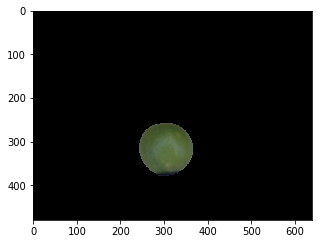

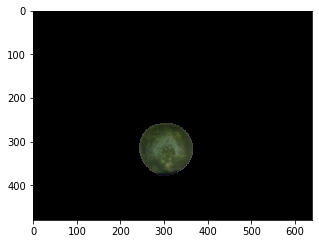

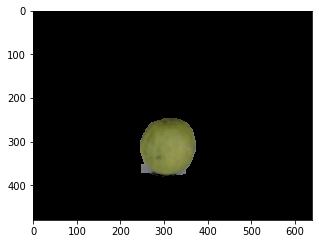

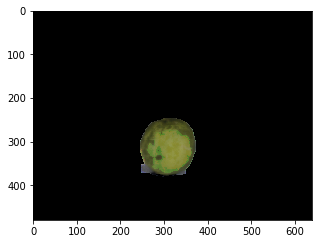

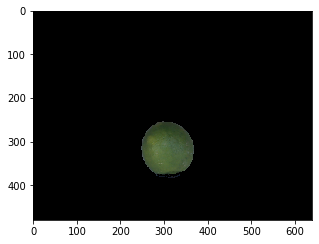

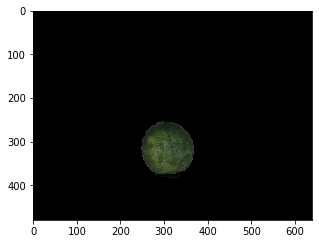

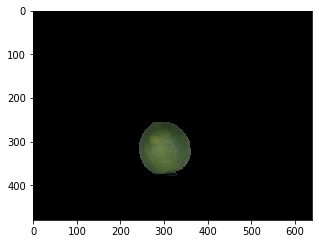

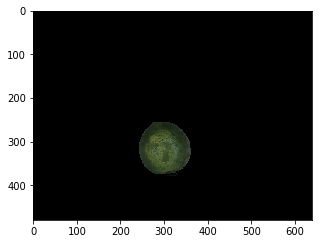

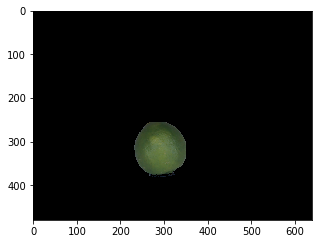

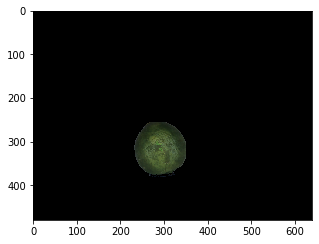

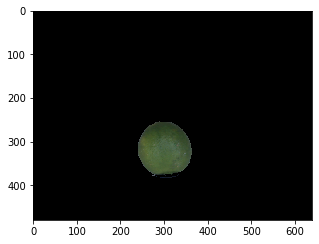

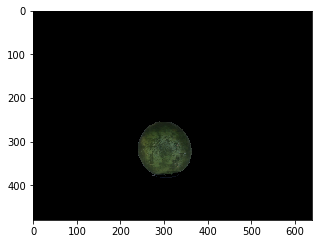

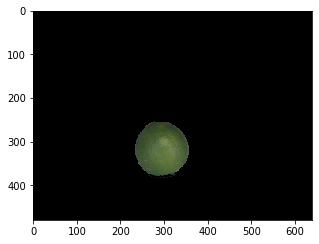

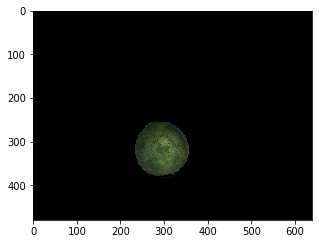

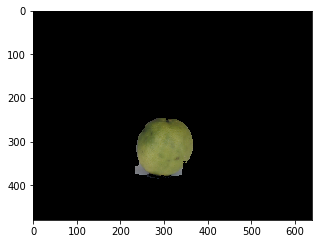

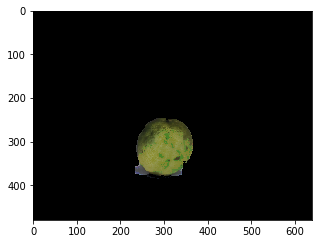

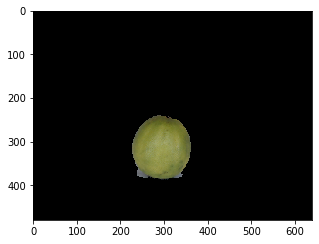

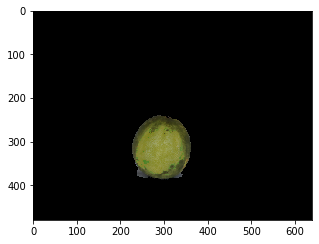

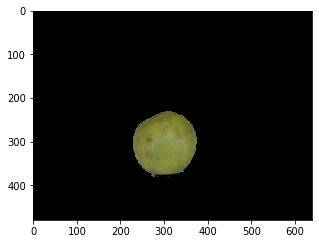

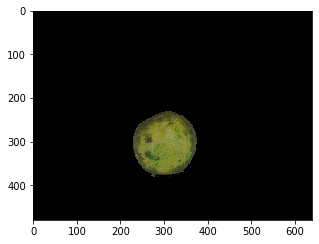

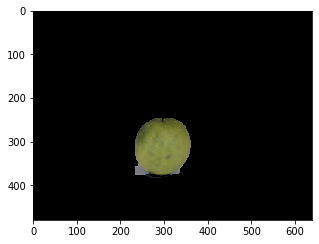

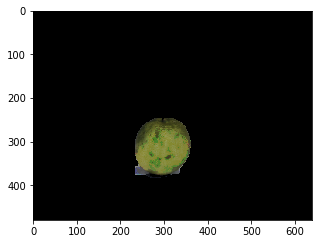

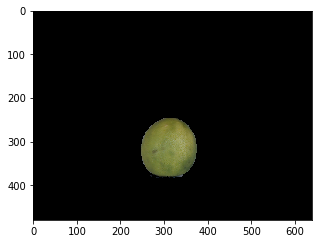

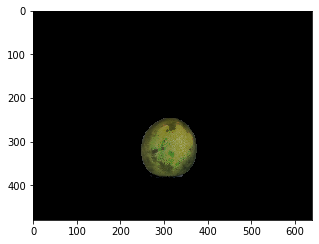

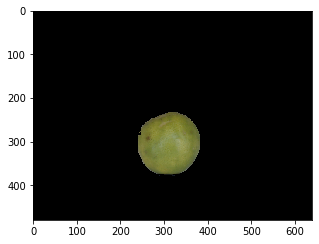

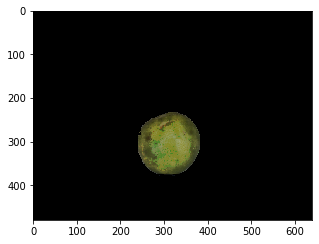

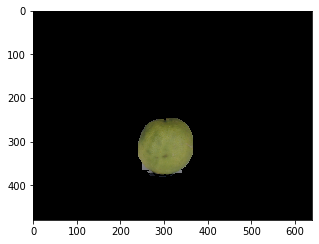

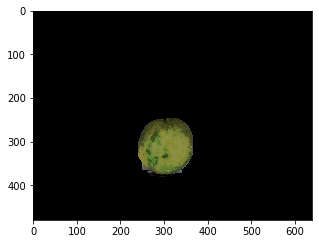

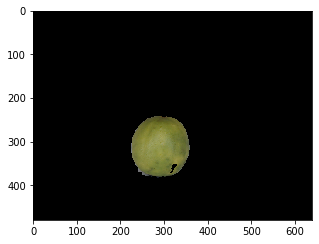

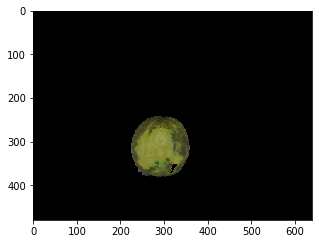

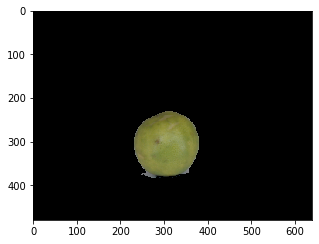

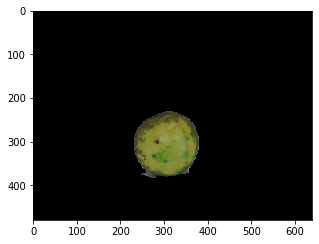

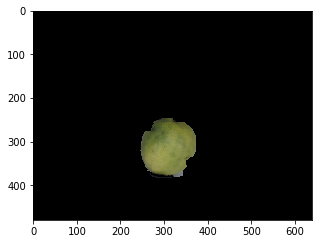

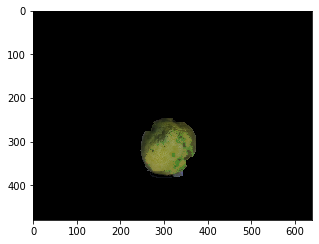

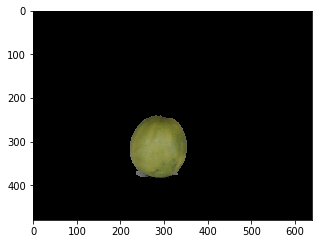

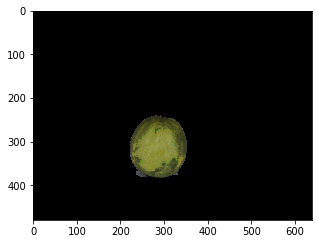

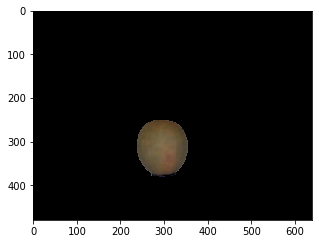

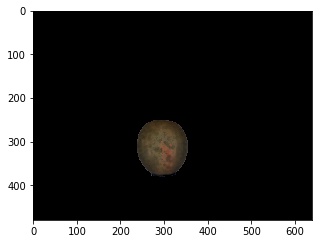

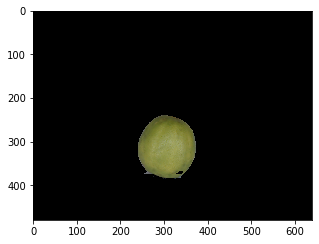

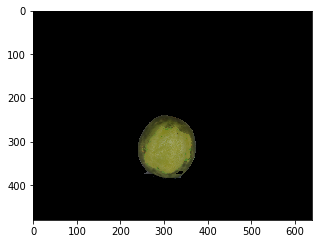

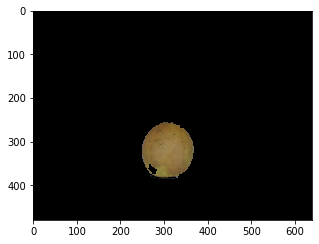

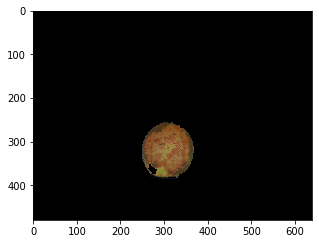

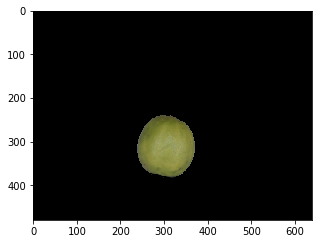

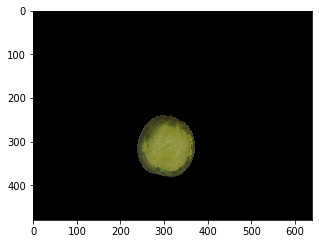

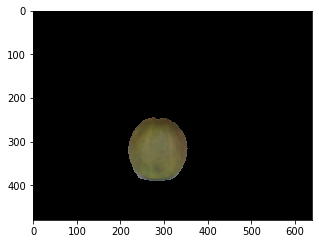

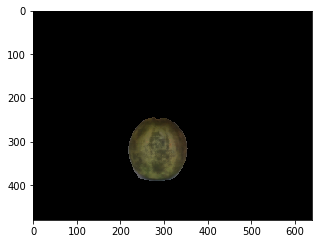

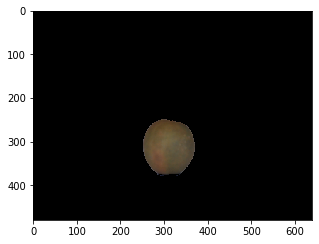

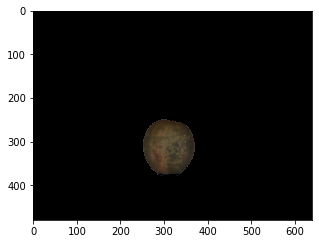

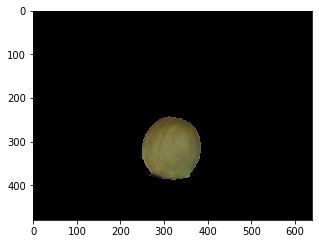

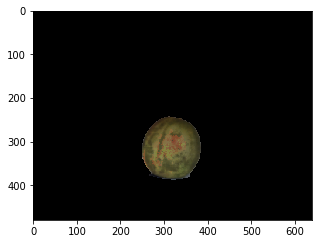

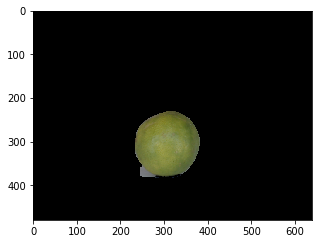

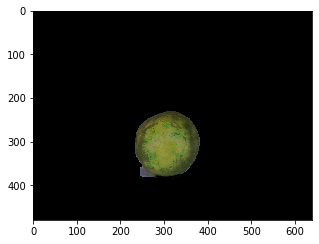

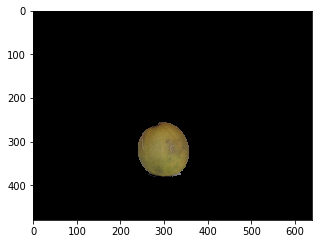

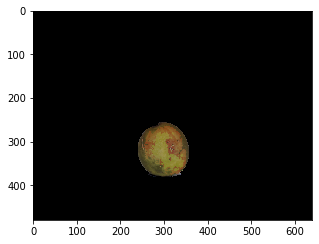

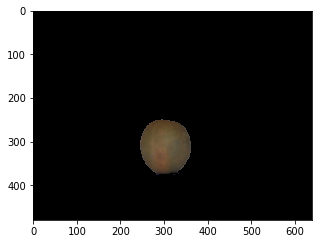

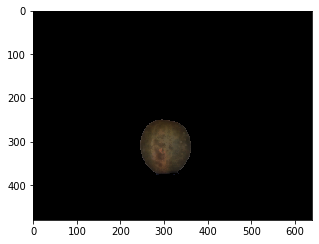

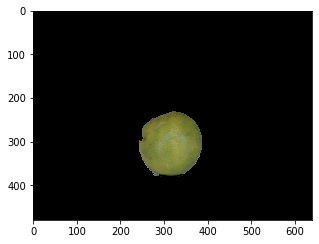

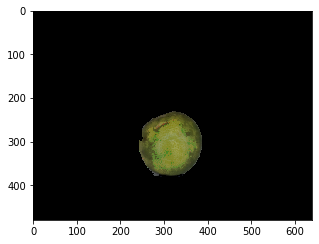

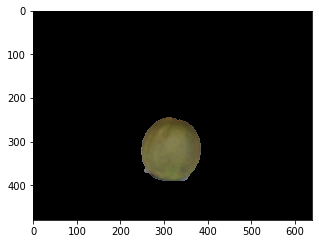

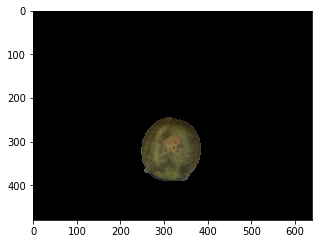

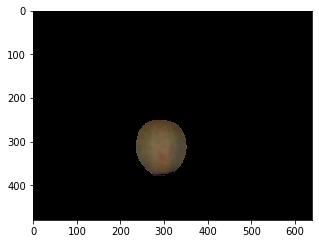

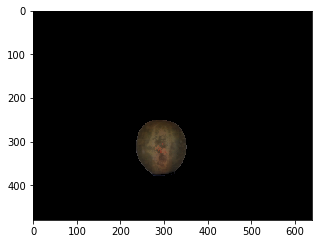

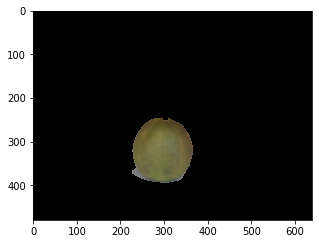

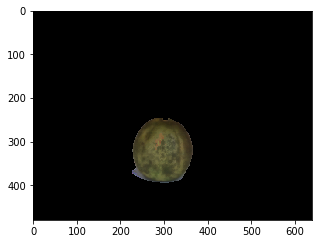

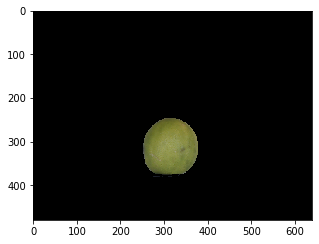

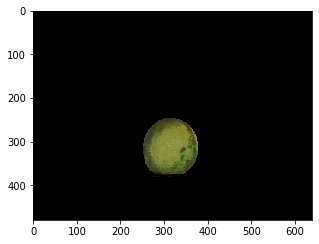

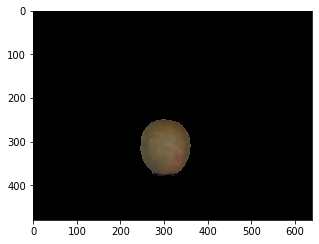

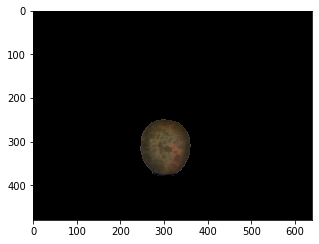

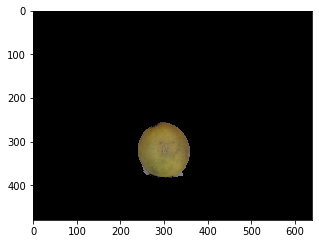

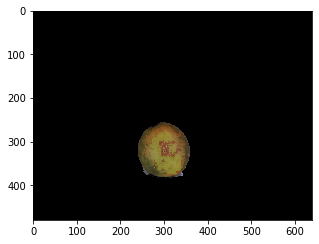

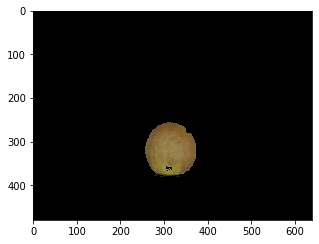

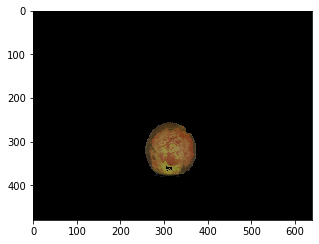

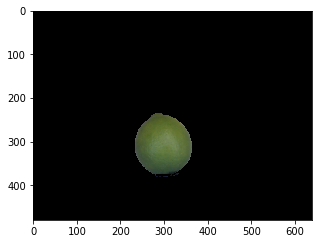

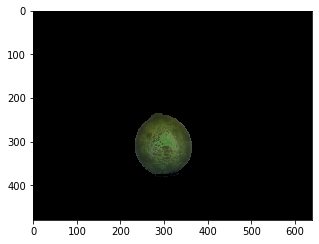

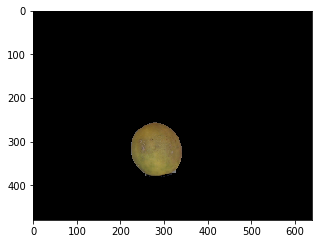

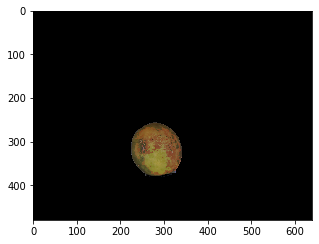

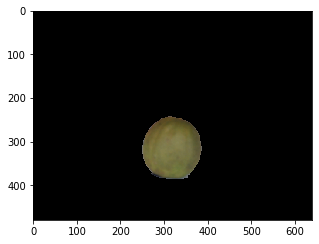

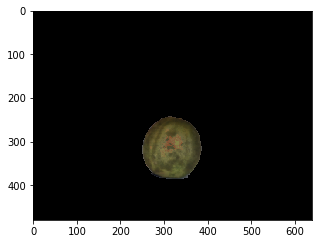

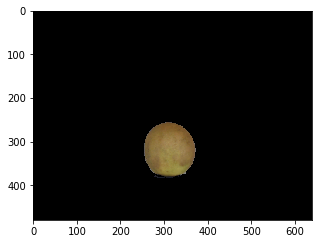

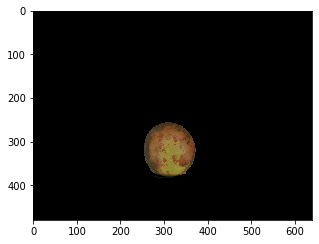

In [33]:
ldis=root_path+'lemon_diseases/' 
imgn2=[]
rgbArray2 = np.zeros((480,640,3), 'uint8')
for i in range(nl): 
  imgn2=lemons[i]
  rgbArray2[..., 0] = imgn2[:,:,0]-2*imgn2[:,:,0]*(imgn[i]/255) #Segmentation of Red plane
  rgbArray2[..., 1] = imgn2[:,:,1]-2*imgn2[:,:,1]*(imgn[i]/255) #Segmentation of Green plane
  rgbArray2[..., 2] = imgn2[:,:,2]-2*imgn2[:,:,2]*(imgn[i]/255)  #Segmentation of Blue plane
  imsave(np.str(ldis+filesm[i]),rgbArray2) 
  #fig1 = plt.figure(figsize=(5, 5))
  #plt.imshow(lemons[i])
  #fig2 = plt.figure(figsize=(5, 5))
  #plt.imshow(rgbArray2) 

# Preliminar results (informative section)



## Image preprocessing (this is a previous reference)


In [0]:
# Filtering
#eimg =[]
#for i in range(n):
#  eimg.append(equ_image(imgs[i]))

In [0]:
##cimg2 = concatenate_images(imgs[1],eimg[1])
#fig1 = plt.figure(figsize=(10, 10))
#plt.imshow(eimg[1], cmap='Greys_r')

In [0]:
#thresh = 0.1
#bimg =[]
#for i in range(n):
#  #e0=eimg[i]
#  bimg.append(eimg[i]>thresh)

In [0]:
#bimagen= 1*(bimg[1])
#np.min(bimagen)
#fig1 = plt.figure(figsize=(10, 10))
#plt.imshow(bimagen, cmap='Greys_r')

In [0]:
# Generate masks
#mask =[]
#for i in range(n):
#  mask.append(1*(bimg[i]))

## Save masks

In [0]:
#os.chdir(groundtruth)
#mask_s =[]
#for i in range(n):
#  maskn=mask[i]
#  mask_s.append(255*(maskn.astype(np.uint8)))
#  cv.imwrite(files[i], mask_s[i])

In [0]:
#fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
#ax = axes.ravel()
#image=imgs[1]
#binary=mask[1]

#ax[0] = plt.subplot(1, 3, 1)
#ax[1] = plt.subplot(1, 3, 2)
#ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

#ax[0].imshow(image, cmap=plt.cm.gray)
#ax[0].set_title('Original')
#ax[0].axis('off')

#ax[1].hist(image.ravel(), bins=256)
#ax[1].set_title('Histogram')
#ax[1].axvline(thresh, color='r')

#ax[2].imshow(binary, cmap=plt.cm.gray)
#ax[2].set_title('Thresholded')
#ax[2].axis('off')

#plt.show()



In [0]:
#counts, bins = np.histogram(255*image)
#plt.hist(bins[:-1], bins, weights=counts)

In [0]:
#from skimage.feature import canny

#edges=canny(eimg[1])

#fig1 = plt.figure(figsize=(10, 10))
#plt.imshow(edges, cmap='Greys_r')